<a href="https://colab.research.google.com/github/sandhyamandoli7/Global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Terrorism Analysis**

Global Terrorism Analysis Explore and analyze the data to discover key findings pertaining to terrorist activities. The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017.

The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

# Problem Statement

In this project I am going to analyze Global Terrorism Dataset. This dataset contains information of terrorist activities and terrorist attacks, and includes the information of attacks per year, countries via number of attacks, weapons used and targets of terrorist.

The objective of this project is to explore and analyze the data to discover key findings pertaining to terrorist activities.

## Project Type - EDA(Exploratory Data Analysis)

## **Definition Of Terrorism**

### "The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

# Project Goals

1. Study the source and do some quick research to understand more about the dataset.

2. Clean the data.

3. Prepare the data for processing and analysis.

4. Perform data pre-processing to manipulate the data for analysis and draft out targetted tabels for analysis.

5. Analyze the data more deeply and extract insights.






# Characteristics Of The Database

1. Contains information on over 180,000 terrorist attacks.
2. Currently the most comprehensive unclassified database on terrorist attacks in the world.

3. Efficiently covers attacks between 1970 to 2017.

4. The attacks in the GTD are attributed to more than 2,000 named perpetrator organizations.

# **Import Libraries**

In [2]:

import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Loading Dataset**

In [3]:
df = pd.read_csv("/content/Global Terrorism Data (1).csv"
                 ,engine="python"
                 ,encoding="ISO-8859-1")

# **Overview Of Dataset**

In [5]:
df.head().iloc[:,100:]



,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# **Shape Of Dataframe**

In [6]:
df.shape


(181691, 135)

# Data Preprocessing

Datapreprocessing refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis.

In [7]:
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [8]:
new_df=df[less_null_column]

In [9]:
check=new_df.columns.to_list()


In [10]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide',
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr', 'INT_MISC', 'specificity','gname', 'ishostkid', 'INT_ANY', 'guncertain1', 'provstate']

In [11]:
len(check)-len(selected_columns_1)

28

In [12]:
print(list((set(check)) - (set(selected_columns_1))))

['longitude', 'crit2', 'crit1', 'targtype1', 'nwound', 'scite1', 'weapsubtype1_txt', 'dbsource', 'nperpcap', 'natlty1', 'property', 'region', 'vicinity', 'latitude', 'nperps', 'country', 'summary', 'nkillter', 'nkillus', 'targsubtype1', 'INT_IDEO', 'weaptype1', 'nwoundte', 'weapsubtype1', 'weapdetail', 'extended', 'crit3', 'attacktype1']


In [13]:
df_1=df[selected_columns_1]

In [14]:
df_1.T

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,201712310016,201712310017,201712310018,201712310019,201712310020,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
(df_1.isnull().sum()/len(df_1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.238867
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1_txt          0.858050
weaptype1_txt        0.000000
nkill                5.676120
nwoundus            35.611010
claimed             36.391456
individual           0.000000
INT_LOG              0.000000
doubtterr            0.000550
INT_MISC             0.000000
specificity          0.003302
gname                0.000000
ishostkid            0.097969
INT_ANY              0.000000
guncertain1          0.209146
provstate            0.231712
dtype: float64

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55419 entries, 0 to 55418
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           55419 non-null  int64  
 1   iyear             55419 non-null  int64  
 2   imonth            55419 non-null  int64  
 3   iday              55419 non-null  int64  
 4   country_txt       55419 non-null  object 
 5   region_txt        55419 non-null  object 
 6   city              55419 non-null  object 
 7   multiple          55419 non-null  int64  
 8   success           55419 non-null  int64  
 9   suicide           55419 non-null  int64  
 10  attacktype1_txt   55419 non-null  object 
 11  targtype1_txt     55419 non-null  object 
 12  targsubtype1_txt  53041 non-null  object 
 13  corp1             27587 non-null  object 
 14  target1           55033 non-null  object 
 15  natlty1_txt       55179 non-null  object 
 16  weaptype1_txt     55419 non-null  object

# **Exploratory Data Analysis**

### 1 - Counting Terrorist Attack Per Year









In [16]:
attack_per_year=df_1['iyear'].value_counts()

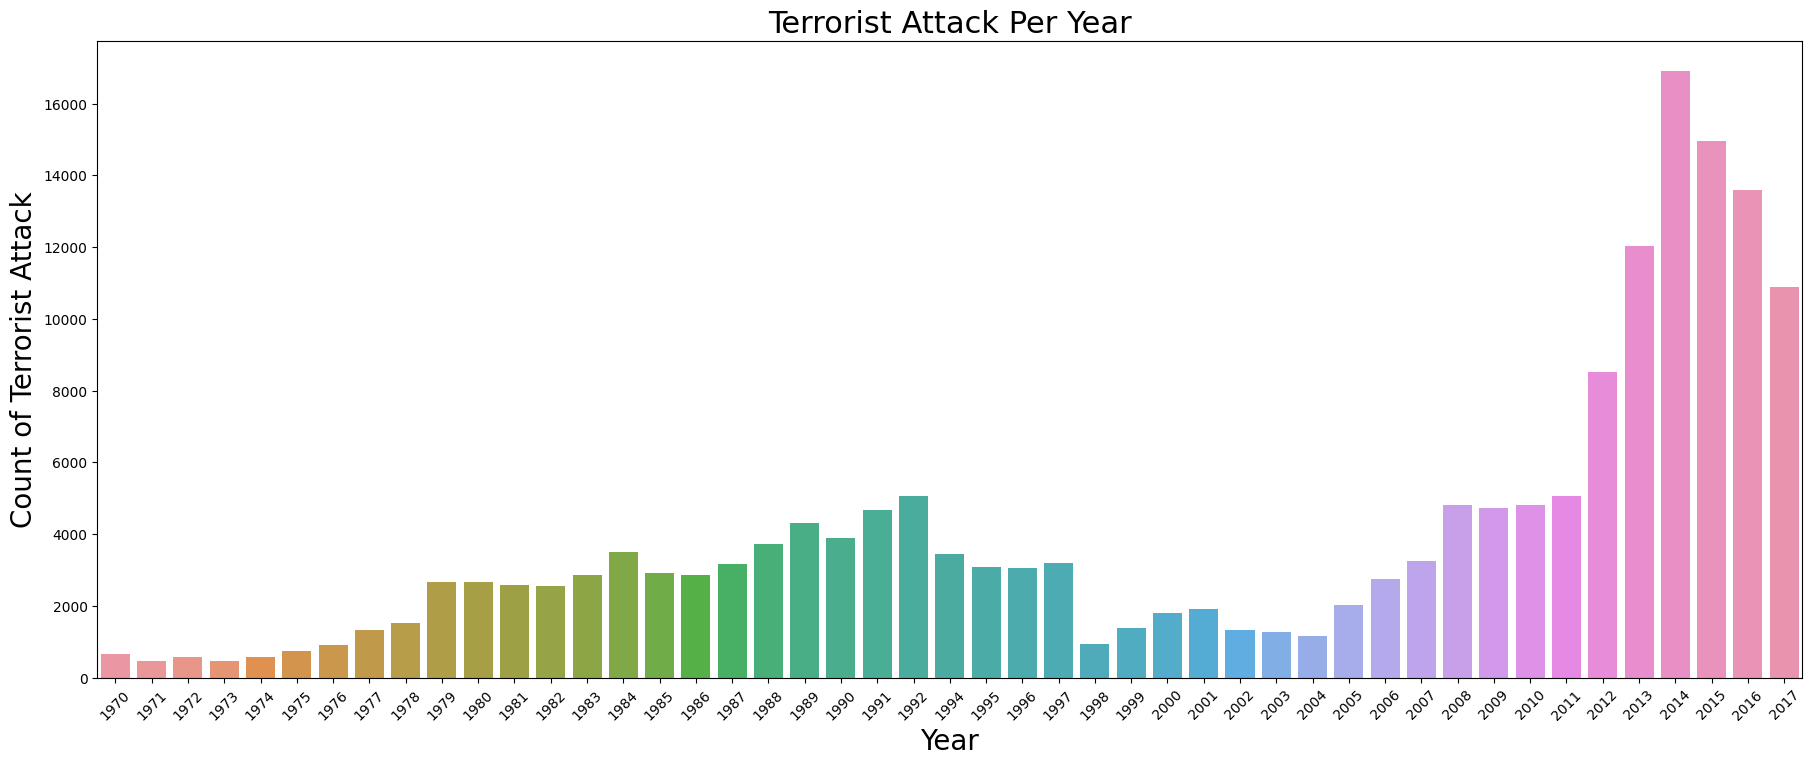

In [17]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df_1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

INFERENCE  
 Most number of terrorist attack happend in 2014, followed by 2015 and then 2016.

### 2 - Top 30 Country via number of attacks

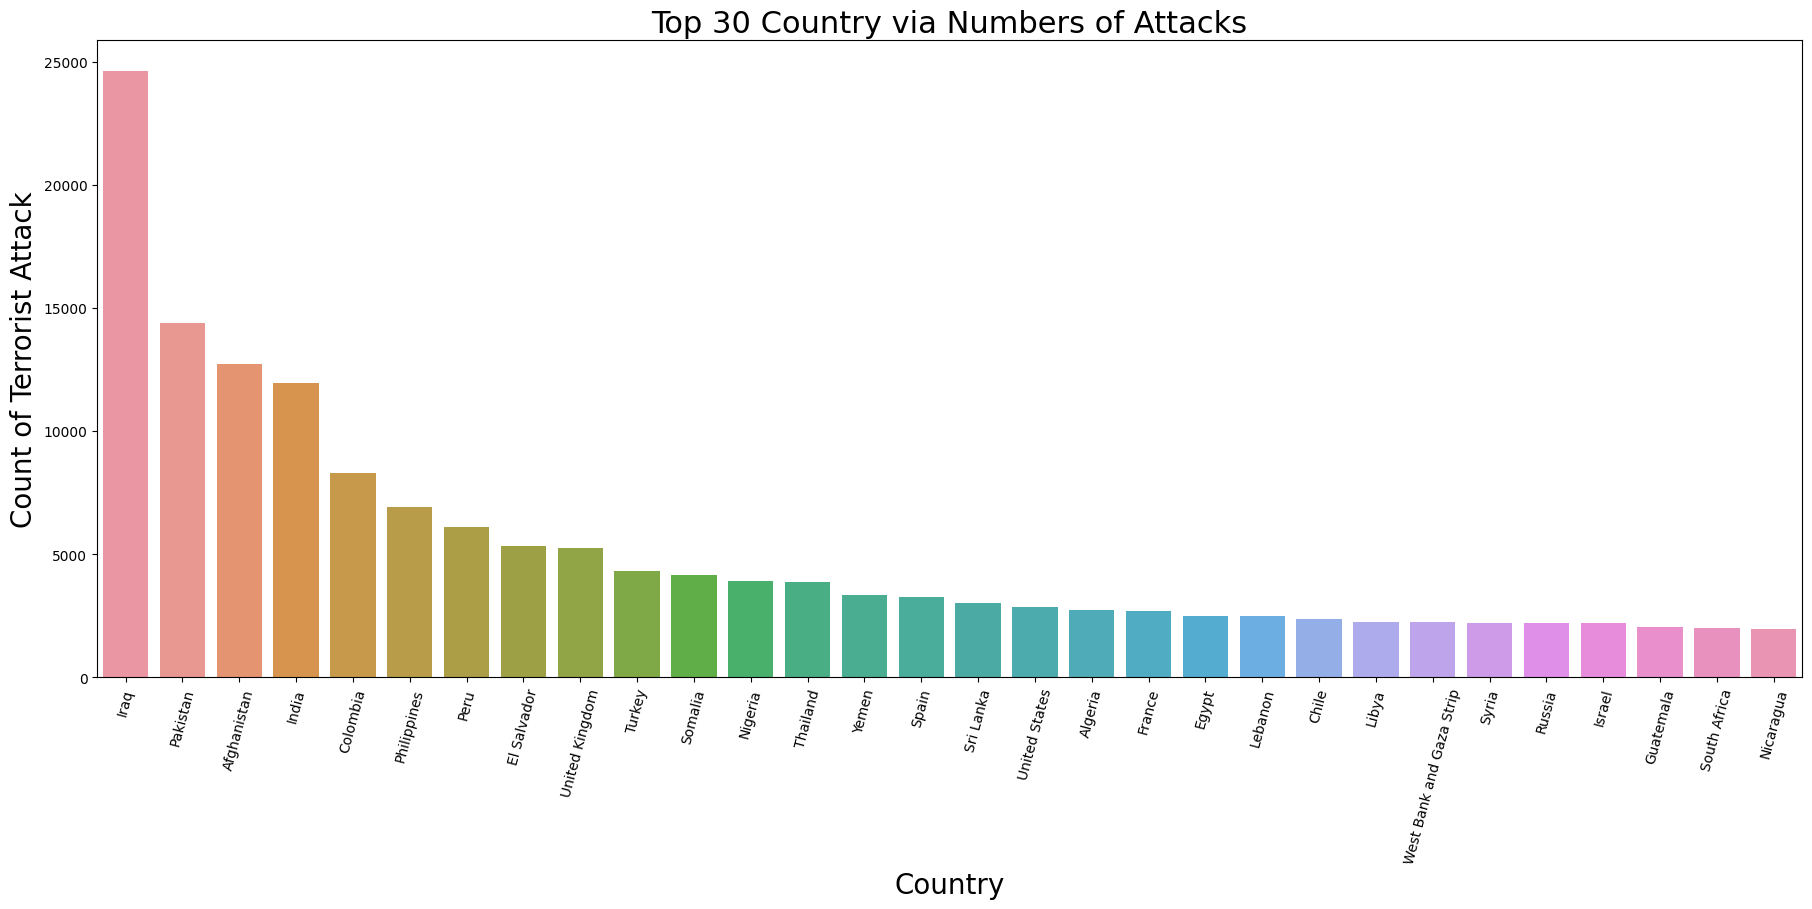

In [18]:

ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='country_txt',data=df_1,order = df_1['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 30 Country via Numbers of Attacks',fontsize=22);

INFERENCE

Outcome of above plotted graph -The country which suffered most number of terrorist attack is Iraq, followed by Pakistan and then Afganistan.

### 3 - Region via Number Of Attacks

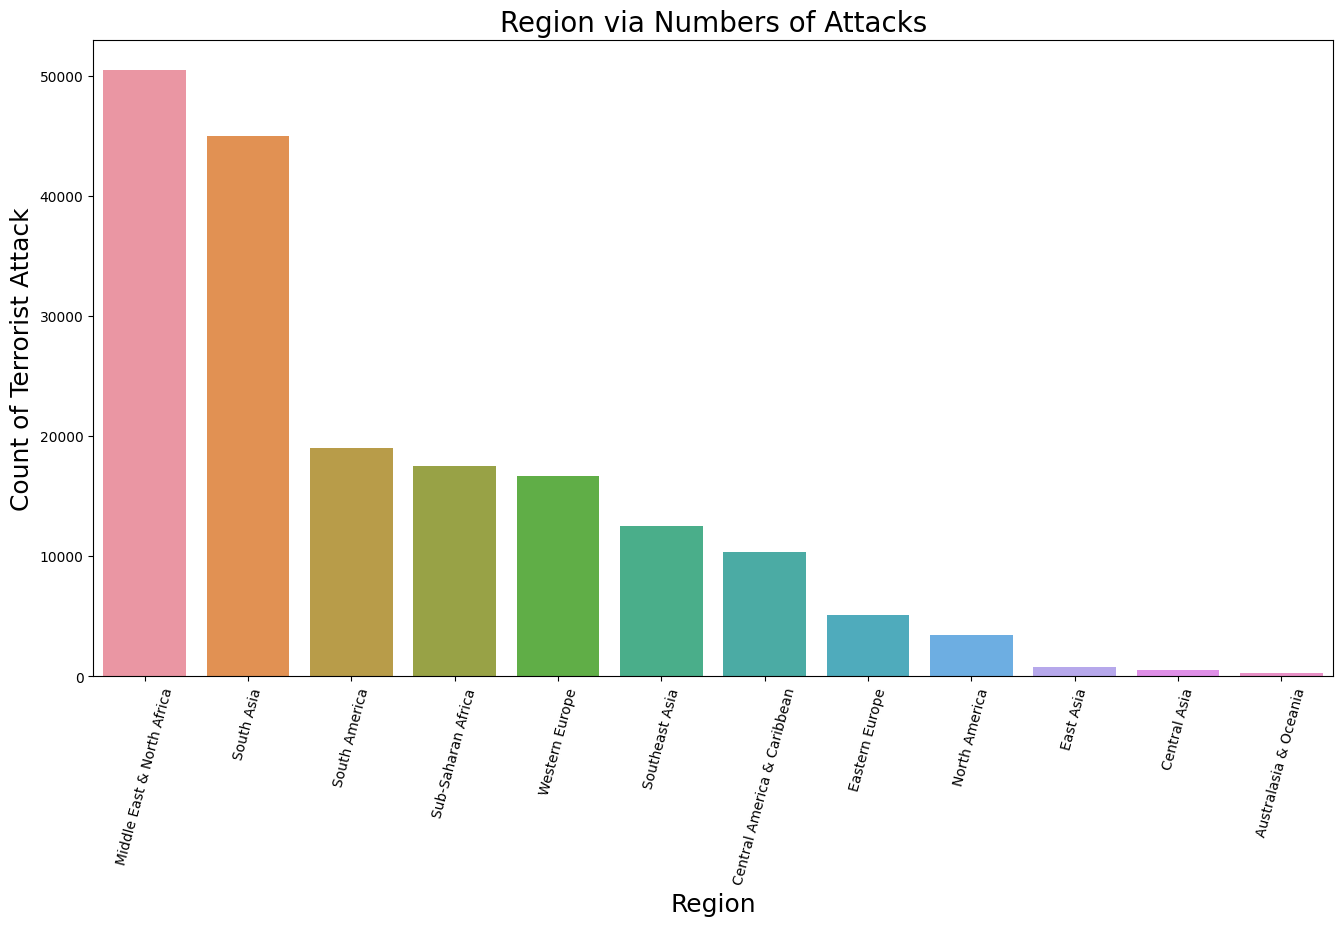

In [19]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='region_txt',data=df_1,order = df_1['region_txt'].value_counts().index)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Region via Numbers of Attacks',fontsize=20);

INFERENCE


Region with most number of terrorist attack is Middle East & North Africa follwed by South Asia and then South America.

### 4 - Most Frequent Used Weapons in Attacks

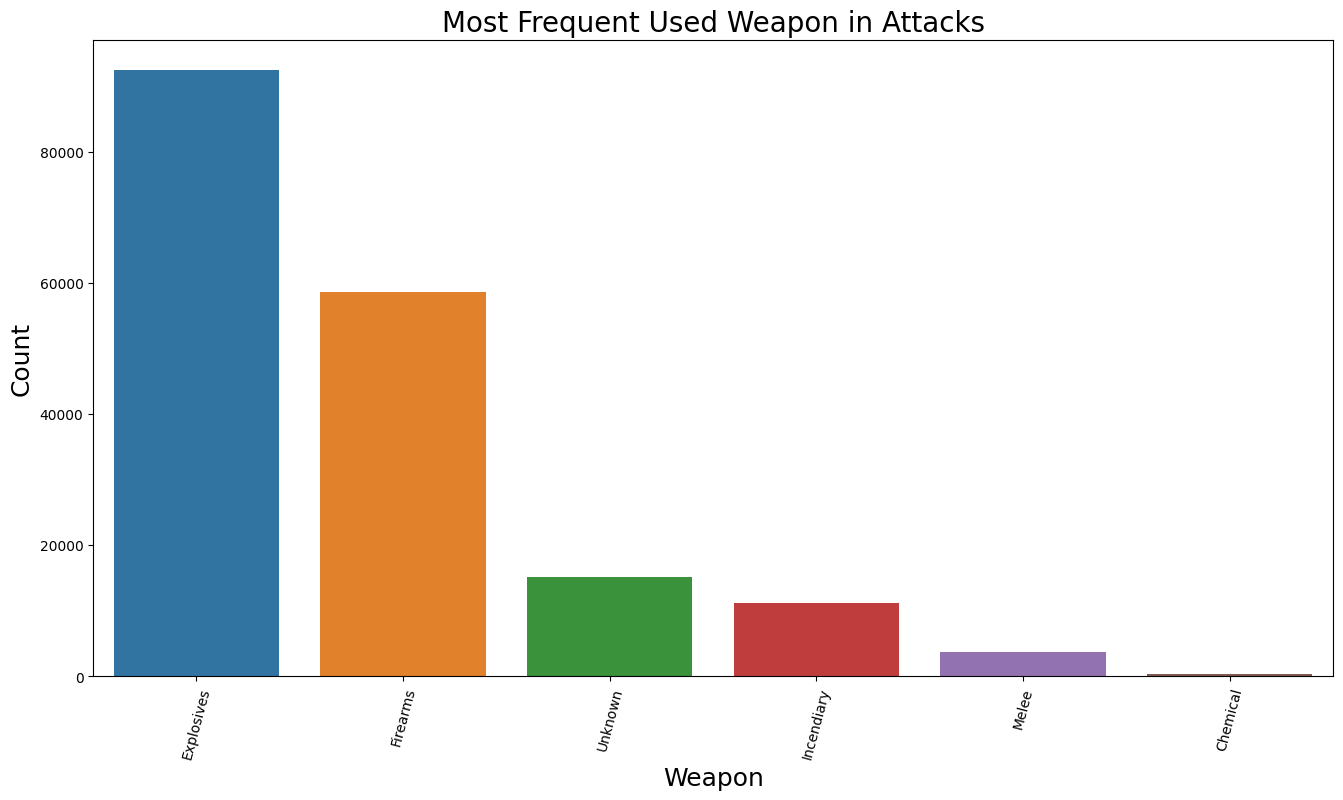

In [20]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df_1,order = df_1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

INFERENCE

Most frequent weapon used in terrorist attack is Explosive followed by Firearms. Least used is Chemical.

### 5 - Most Frequent Target Of Terrorist

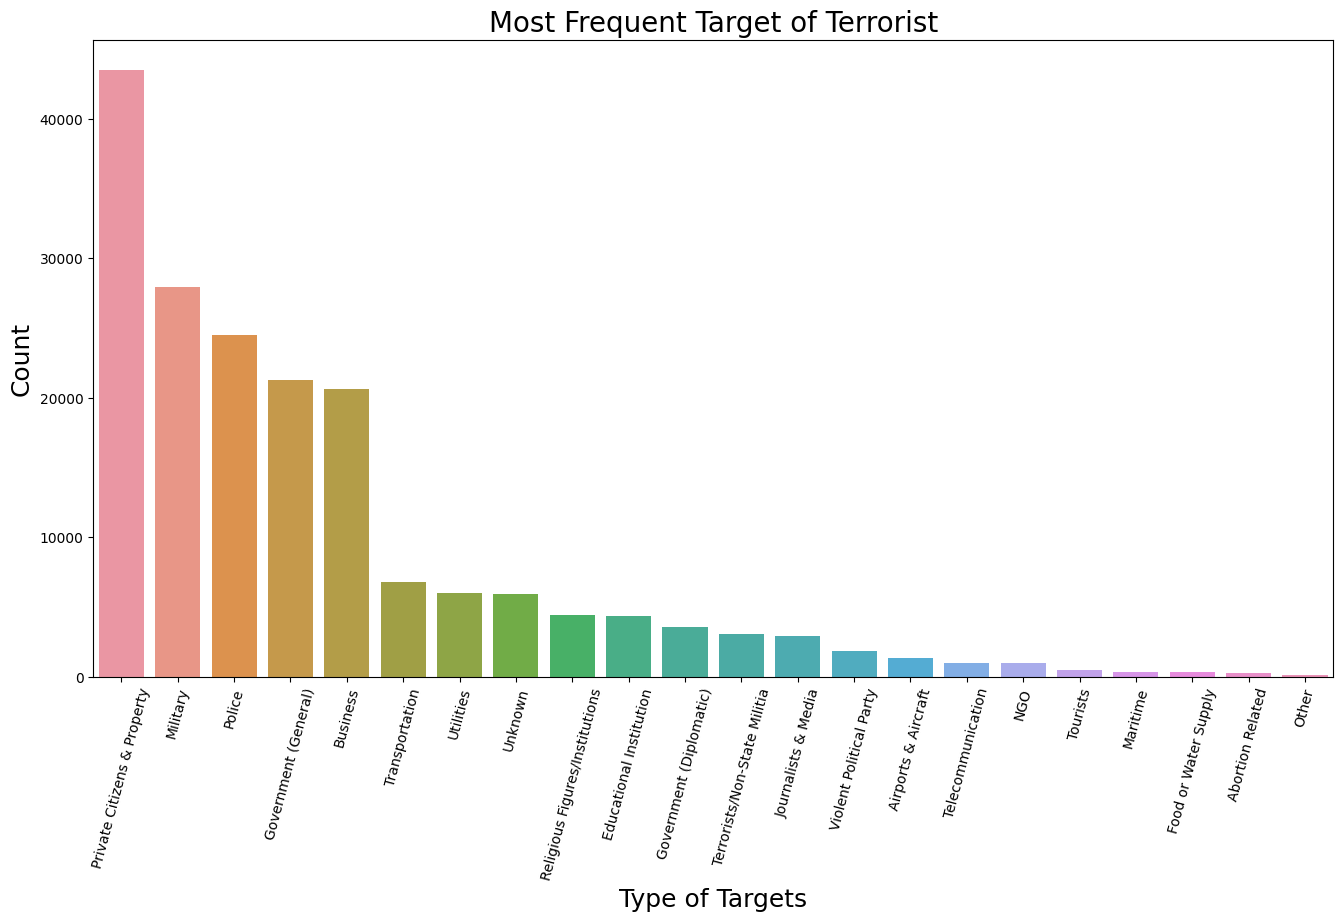

In [21]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='targtype1_txt',data=df_1,order = df_1['targtype1_txt'].value_counts().index)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorist',fontsize=20);

INFERENCE

Most frequent target of terrorist is Private Citizens & Property, followed by Military and then Police.

### 6 - Most Frequent Type Of Attacks

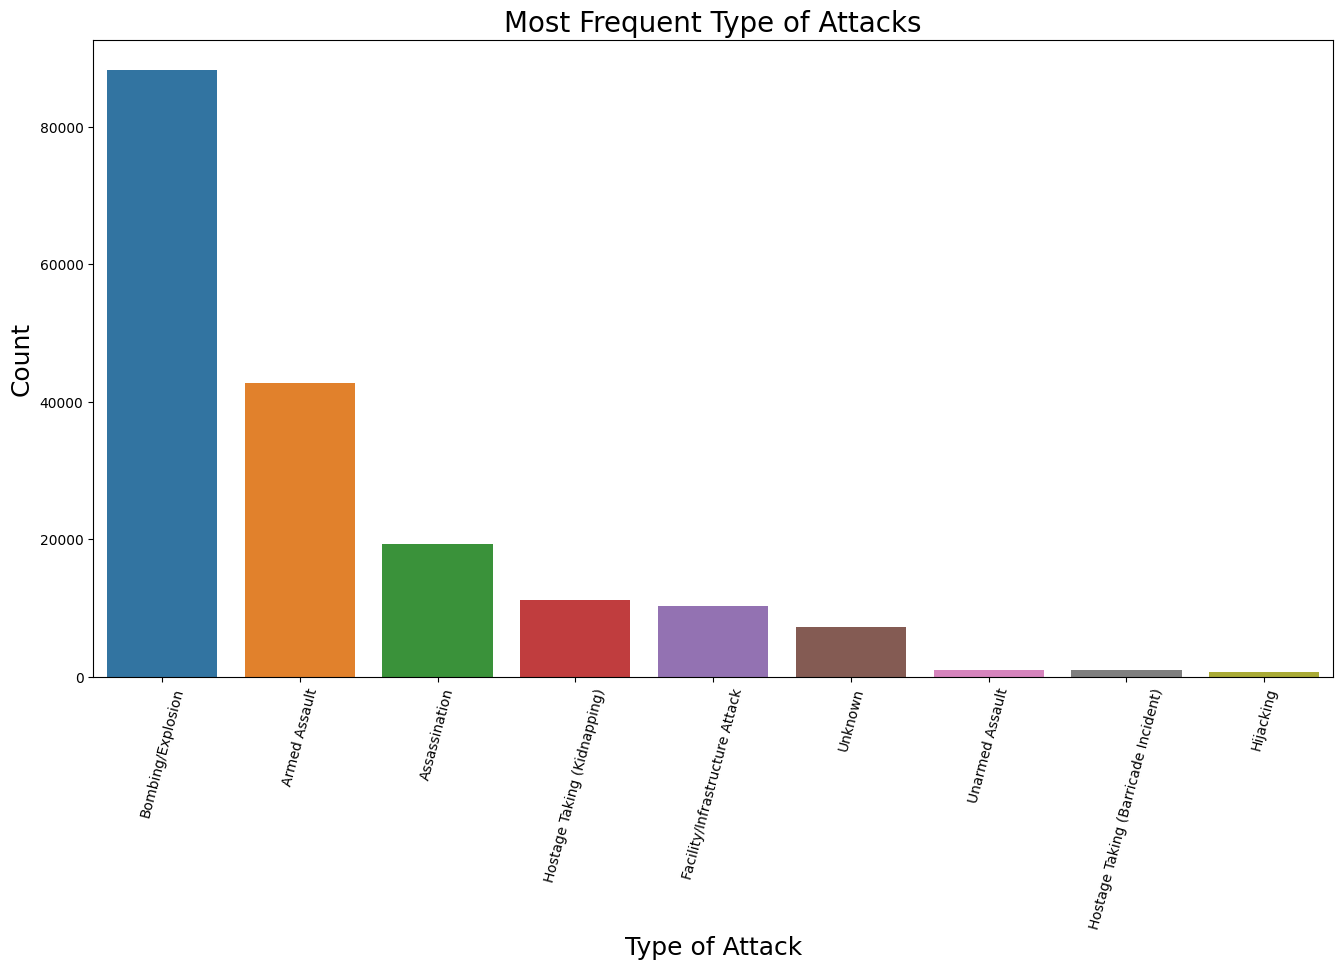

In [22]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df_1,order = df_1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);

INFERENCE

Most frequent type of attack is Bombing/Explosion, followed by Armed Assault and then Assasination.

In [23]:
df_1['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

### 7 - Most Number of Attacks Done By Terrorist Organisation

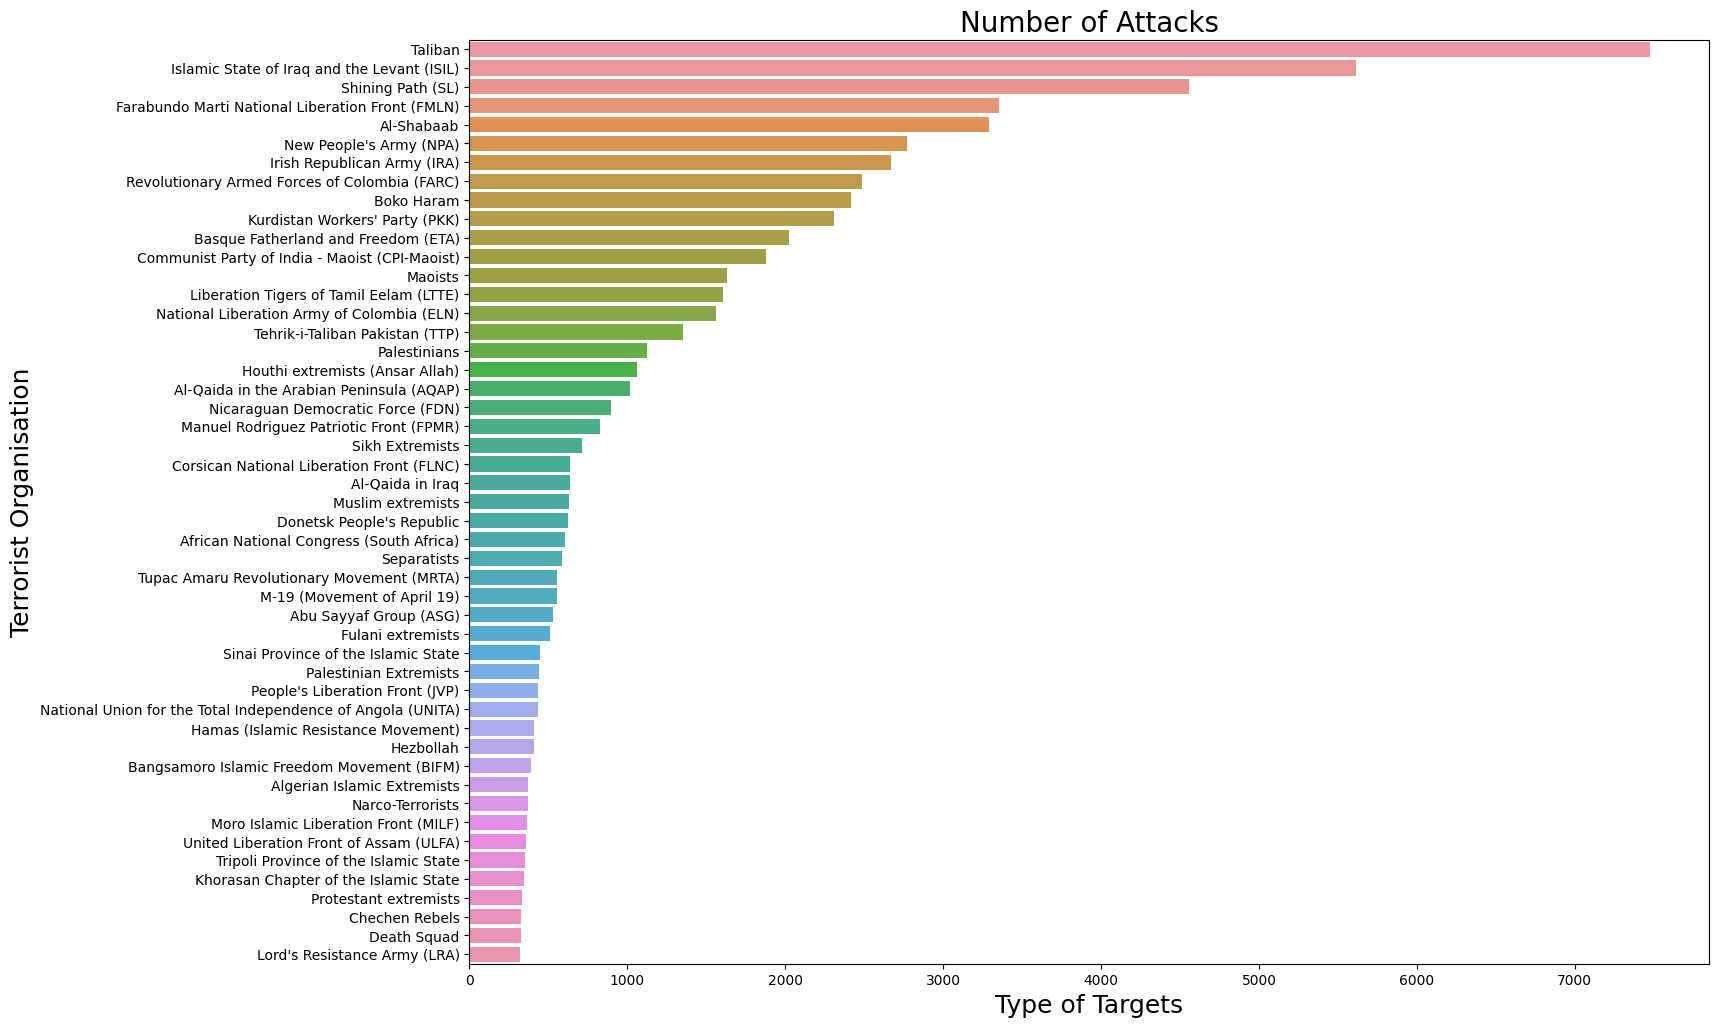

In [24]:
ax=plt.rcParams['figure.figsize'] = 16,12
ax=sns.countplot(y='gname',data=df_1,order = df_1['gname'].value_counts().index[1:50])
ax.set_xlabel('Type of Targets',fontsize=18)
# plt.yticks(rotation = 75)
ax.set_ylabel('Terrorist Organisation',fontsize=18)
ax.set_title('Number of Attacks',fontsize=20);

INFERENCE

Most number of terrorist attacks done by Taliban, followed by Islamic State Of Iraq And Levant (ISIL), and then Shining Path (SL).

In [25]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df_1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df_1[col].value_counts())<50:
    print(df_1[col].value_counts())
    print('\n')
    print(('*')*20)




********************
Value count of Object Type Category which if greater than 50


********************
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


********************
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                          

### 8 - Showing Successful Terrorist Attack

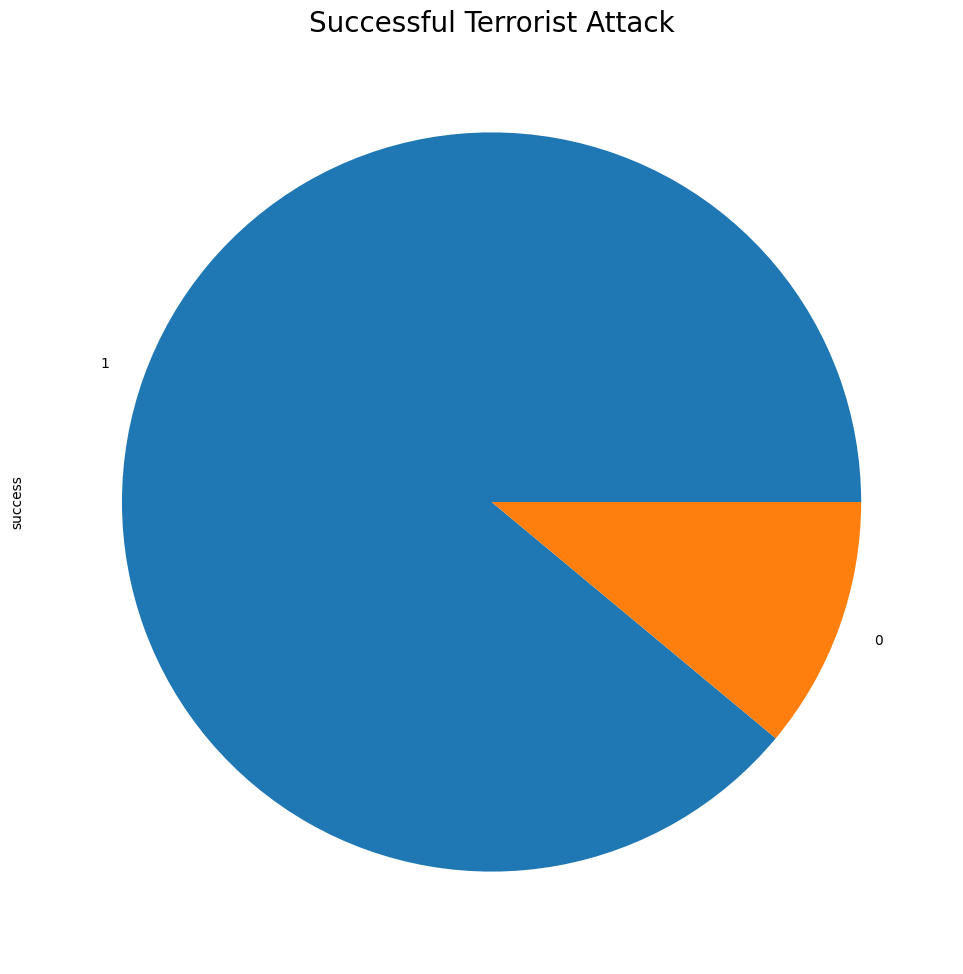

In [26]:
ax=df_1['success'].value_counts().plot(kind='pie')
ax.set_title('Successful Terrorist Attack',fontsize=20);

### 9 - Number Of Multiple Attack

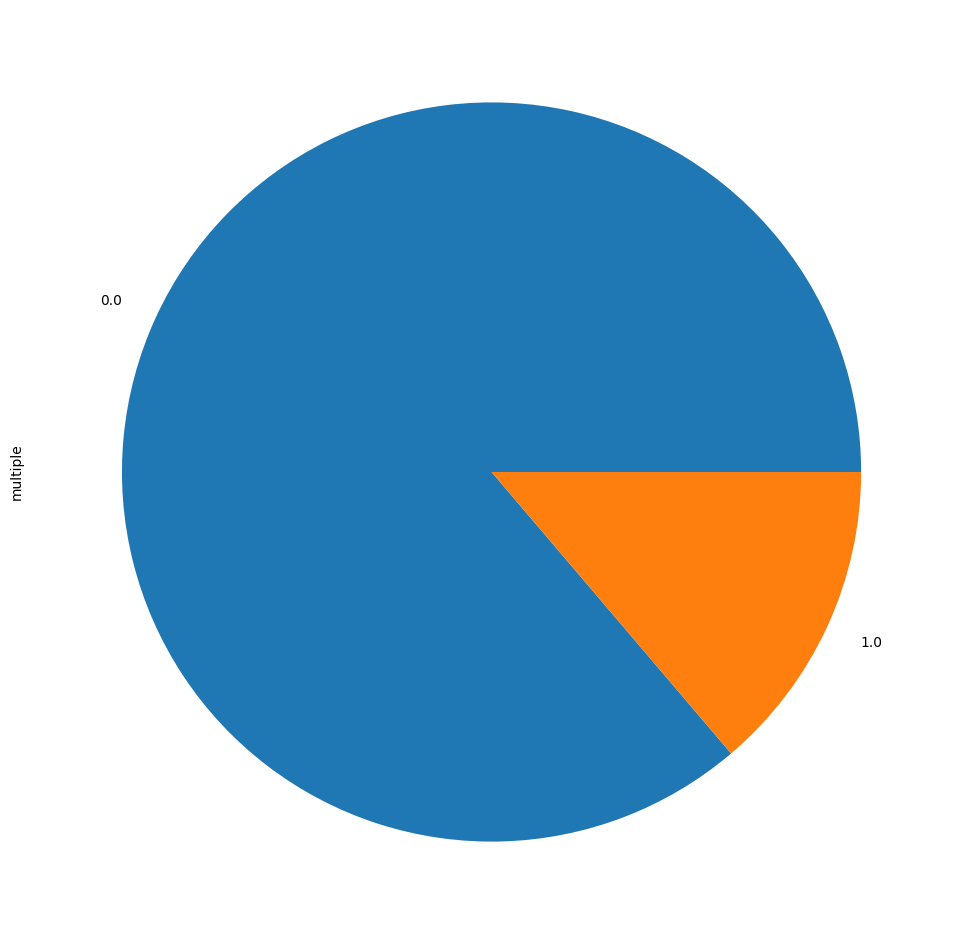

In [27]:
x=df_1['multiple'].value_counts().plot(kind='pie')
ax.set_title('Number of Multiple Attack',fontsize=20);

### 10 - Number Of Suicide Attack

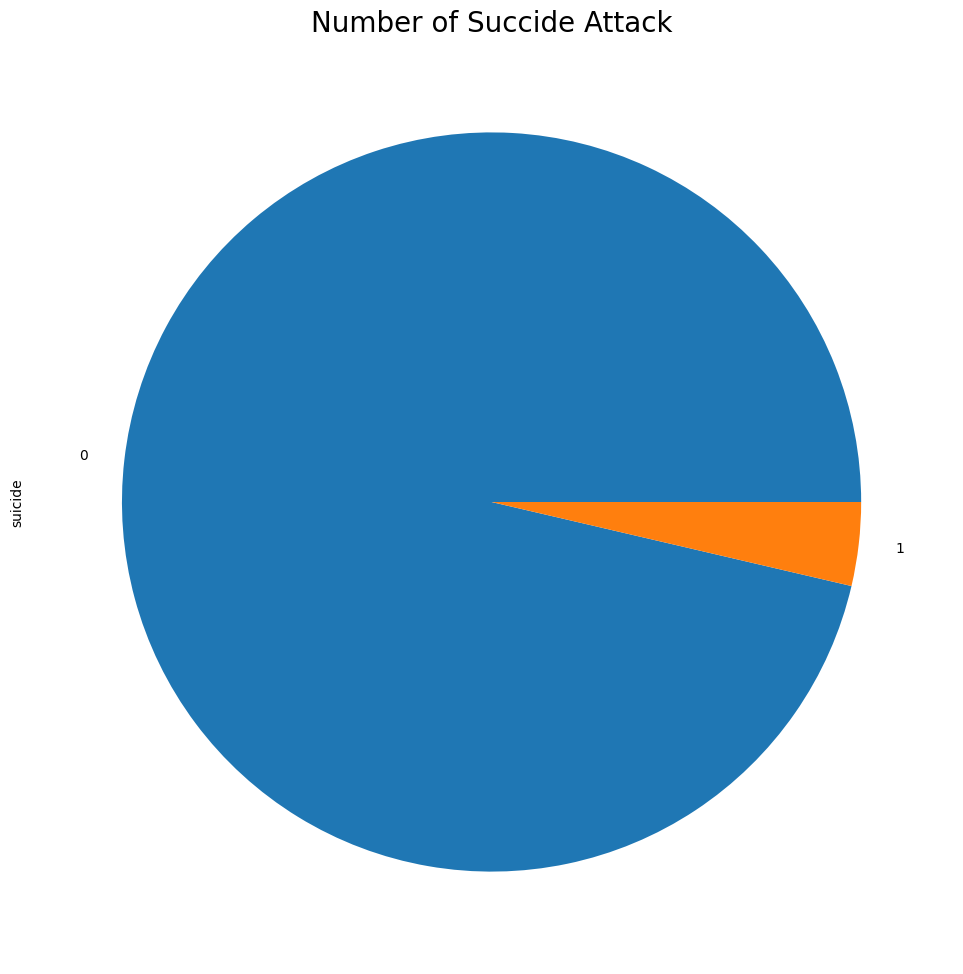

In [28]:
ax=df_1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Suicide Attack',fontsize=20);

# Countries Performance Against Terrorist Attacks

In [29]:
suceess_country=df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['Country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

## 1 -  Top 10 Countries Able To Successfully Tackle Terrorist Attack

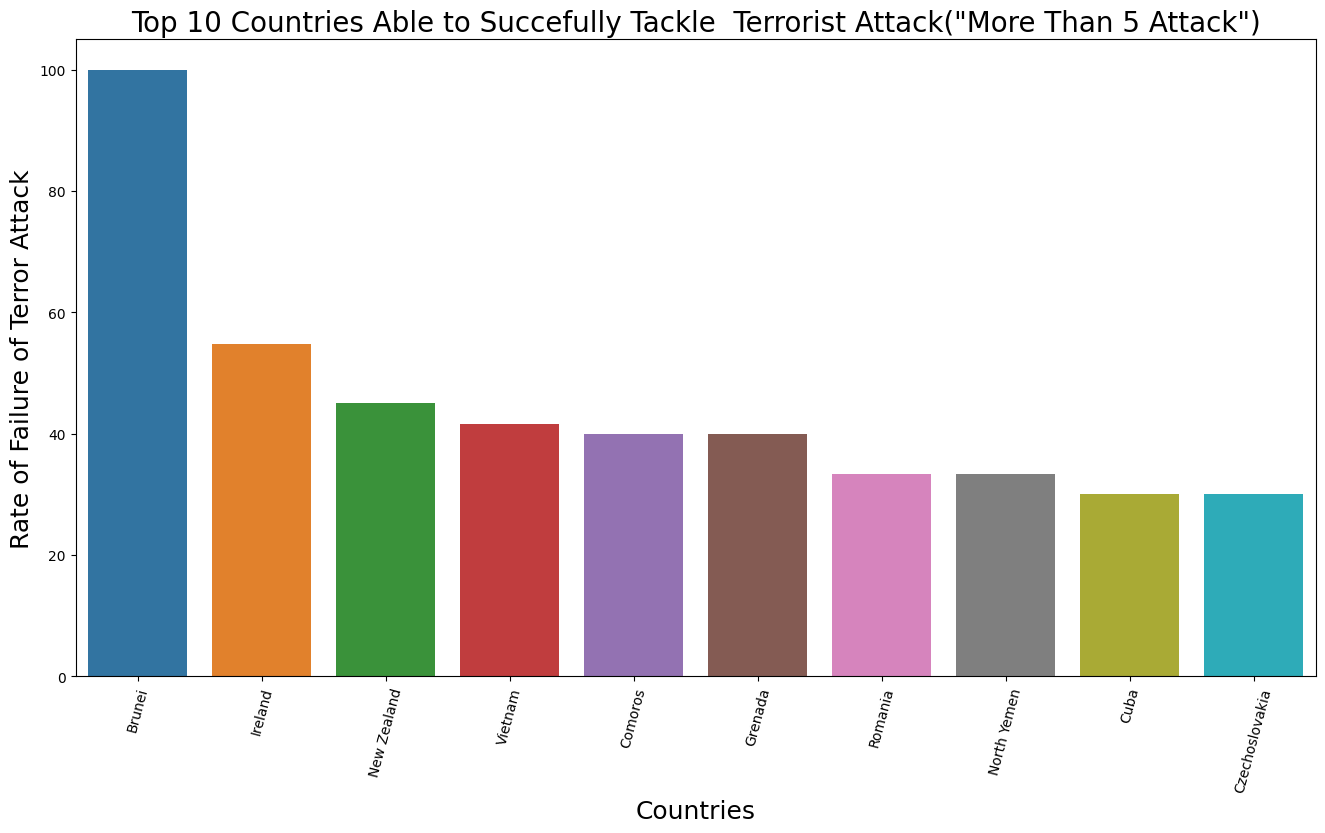

In [30]:
able_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False )[:10]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['Country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Failure of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Able to Succefully Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

INFERENCE

Country who successfully tackle terrorist attack is Brunei , Followed by Guinea and then Grenada.

### 2 - Top 10 Countries Unable To Tackle Terrorist Attack

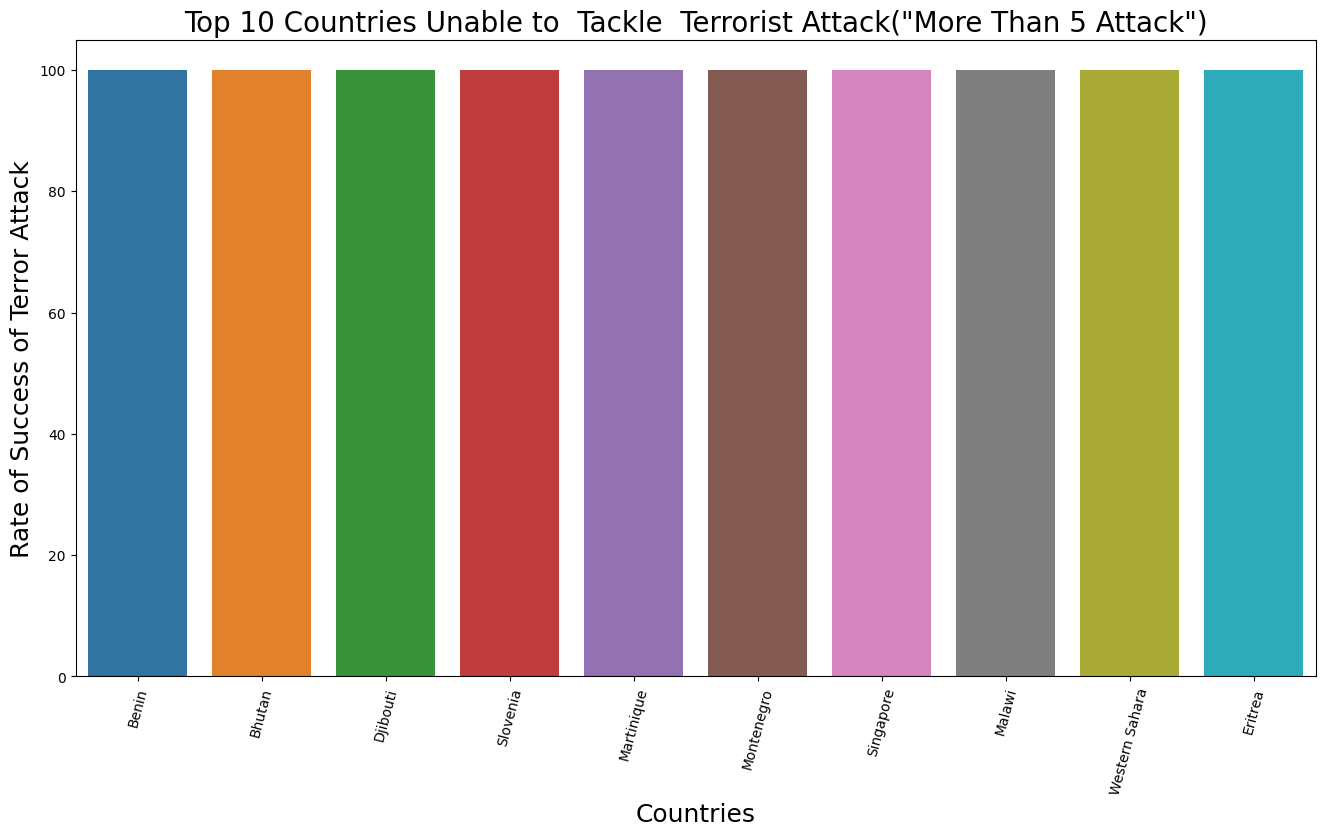

In [31]:
unable_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False )[:10]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['Country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Unable to  Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

INFERENCE

Country which is not able to tackle terrorist attack is Benin(South Africa), followed by Bhutan and then Djbouti(East Africa).

# Trends In Terrorist Attack

In [32]:
attack_per_year=df_1.groupby(['iyear','targtype1_txt','target1','success','weaptype1_txt','gname'])['eventid'].count().to_frame(name = 'Total_Attacks').reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

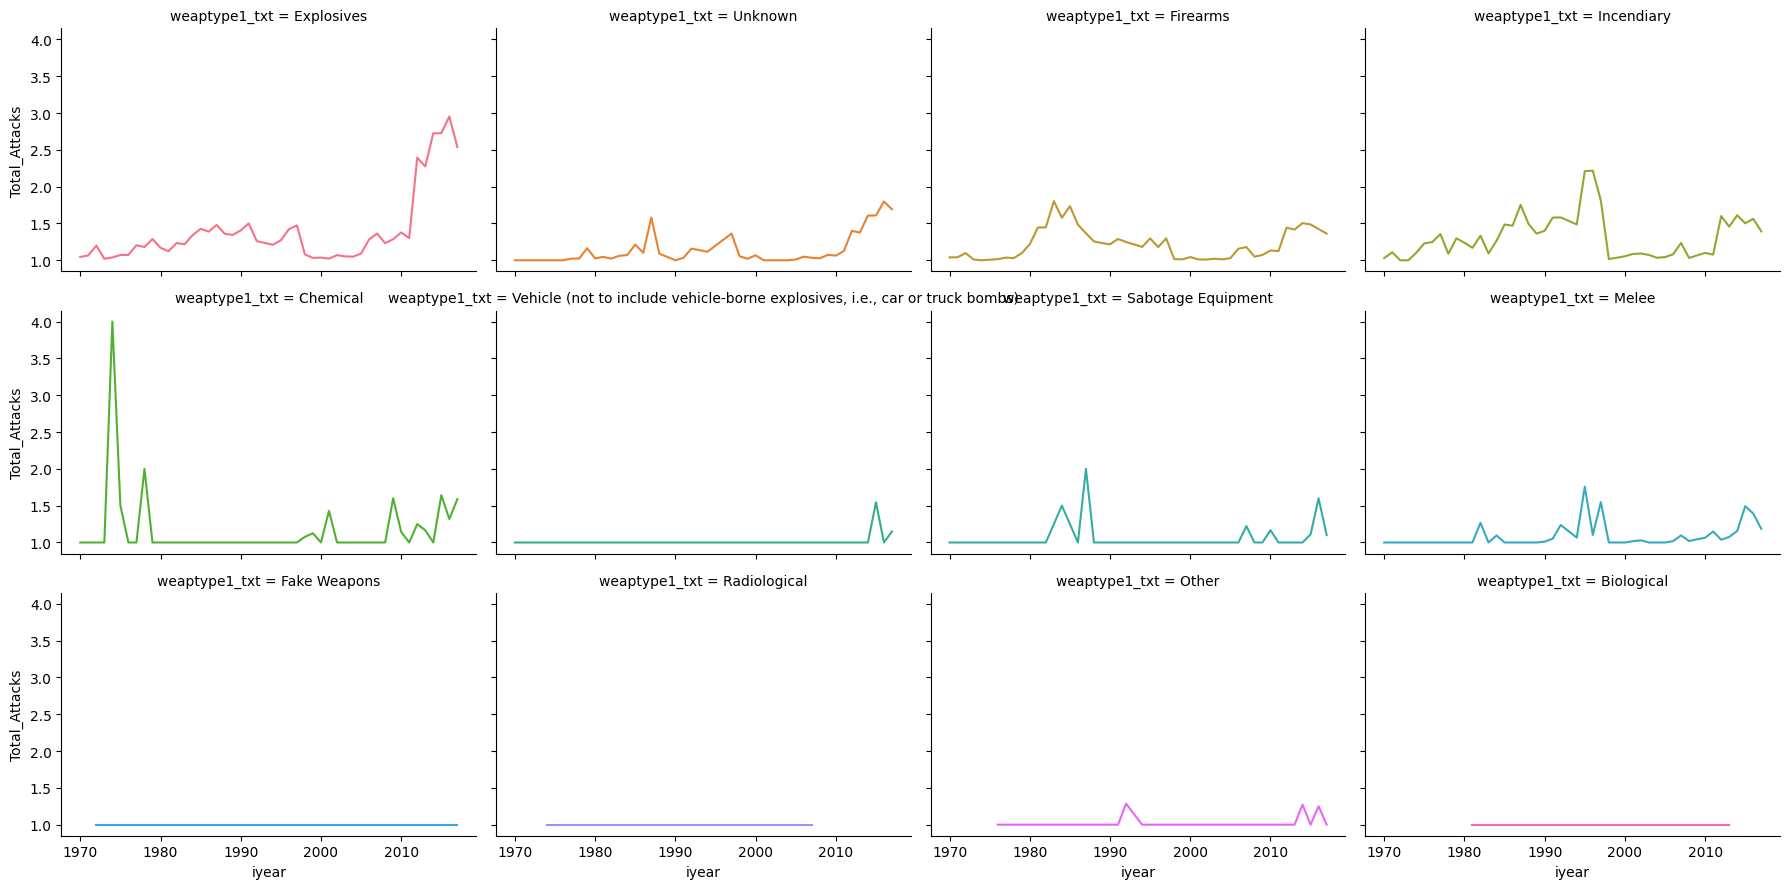

In [35]:
ax= sns.relplot(col="weaptype1_txt", y="Total_Attacks",col_wrap=4, hue='weaptype1_txt',x="iyear",kind='line', ci=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

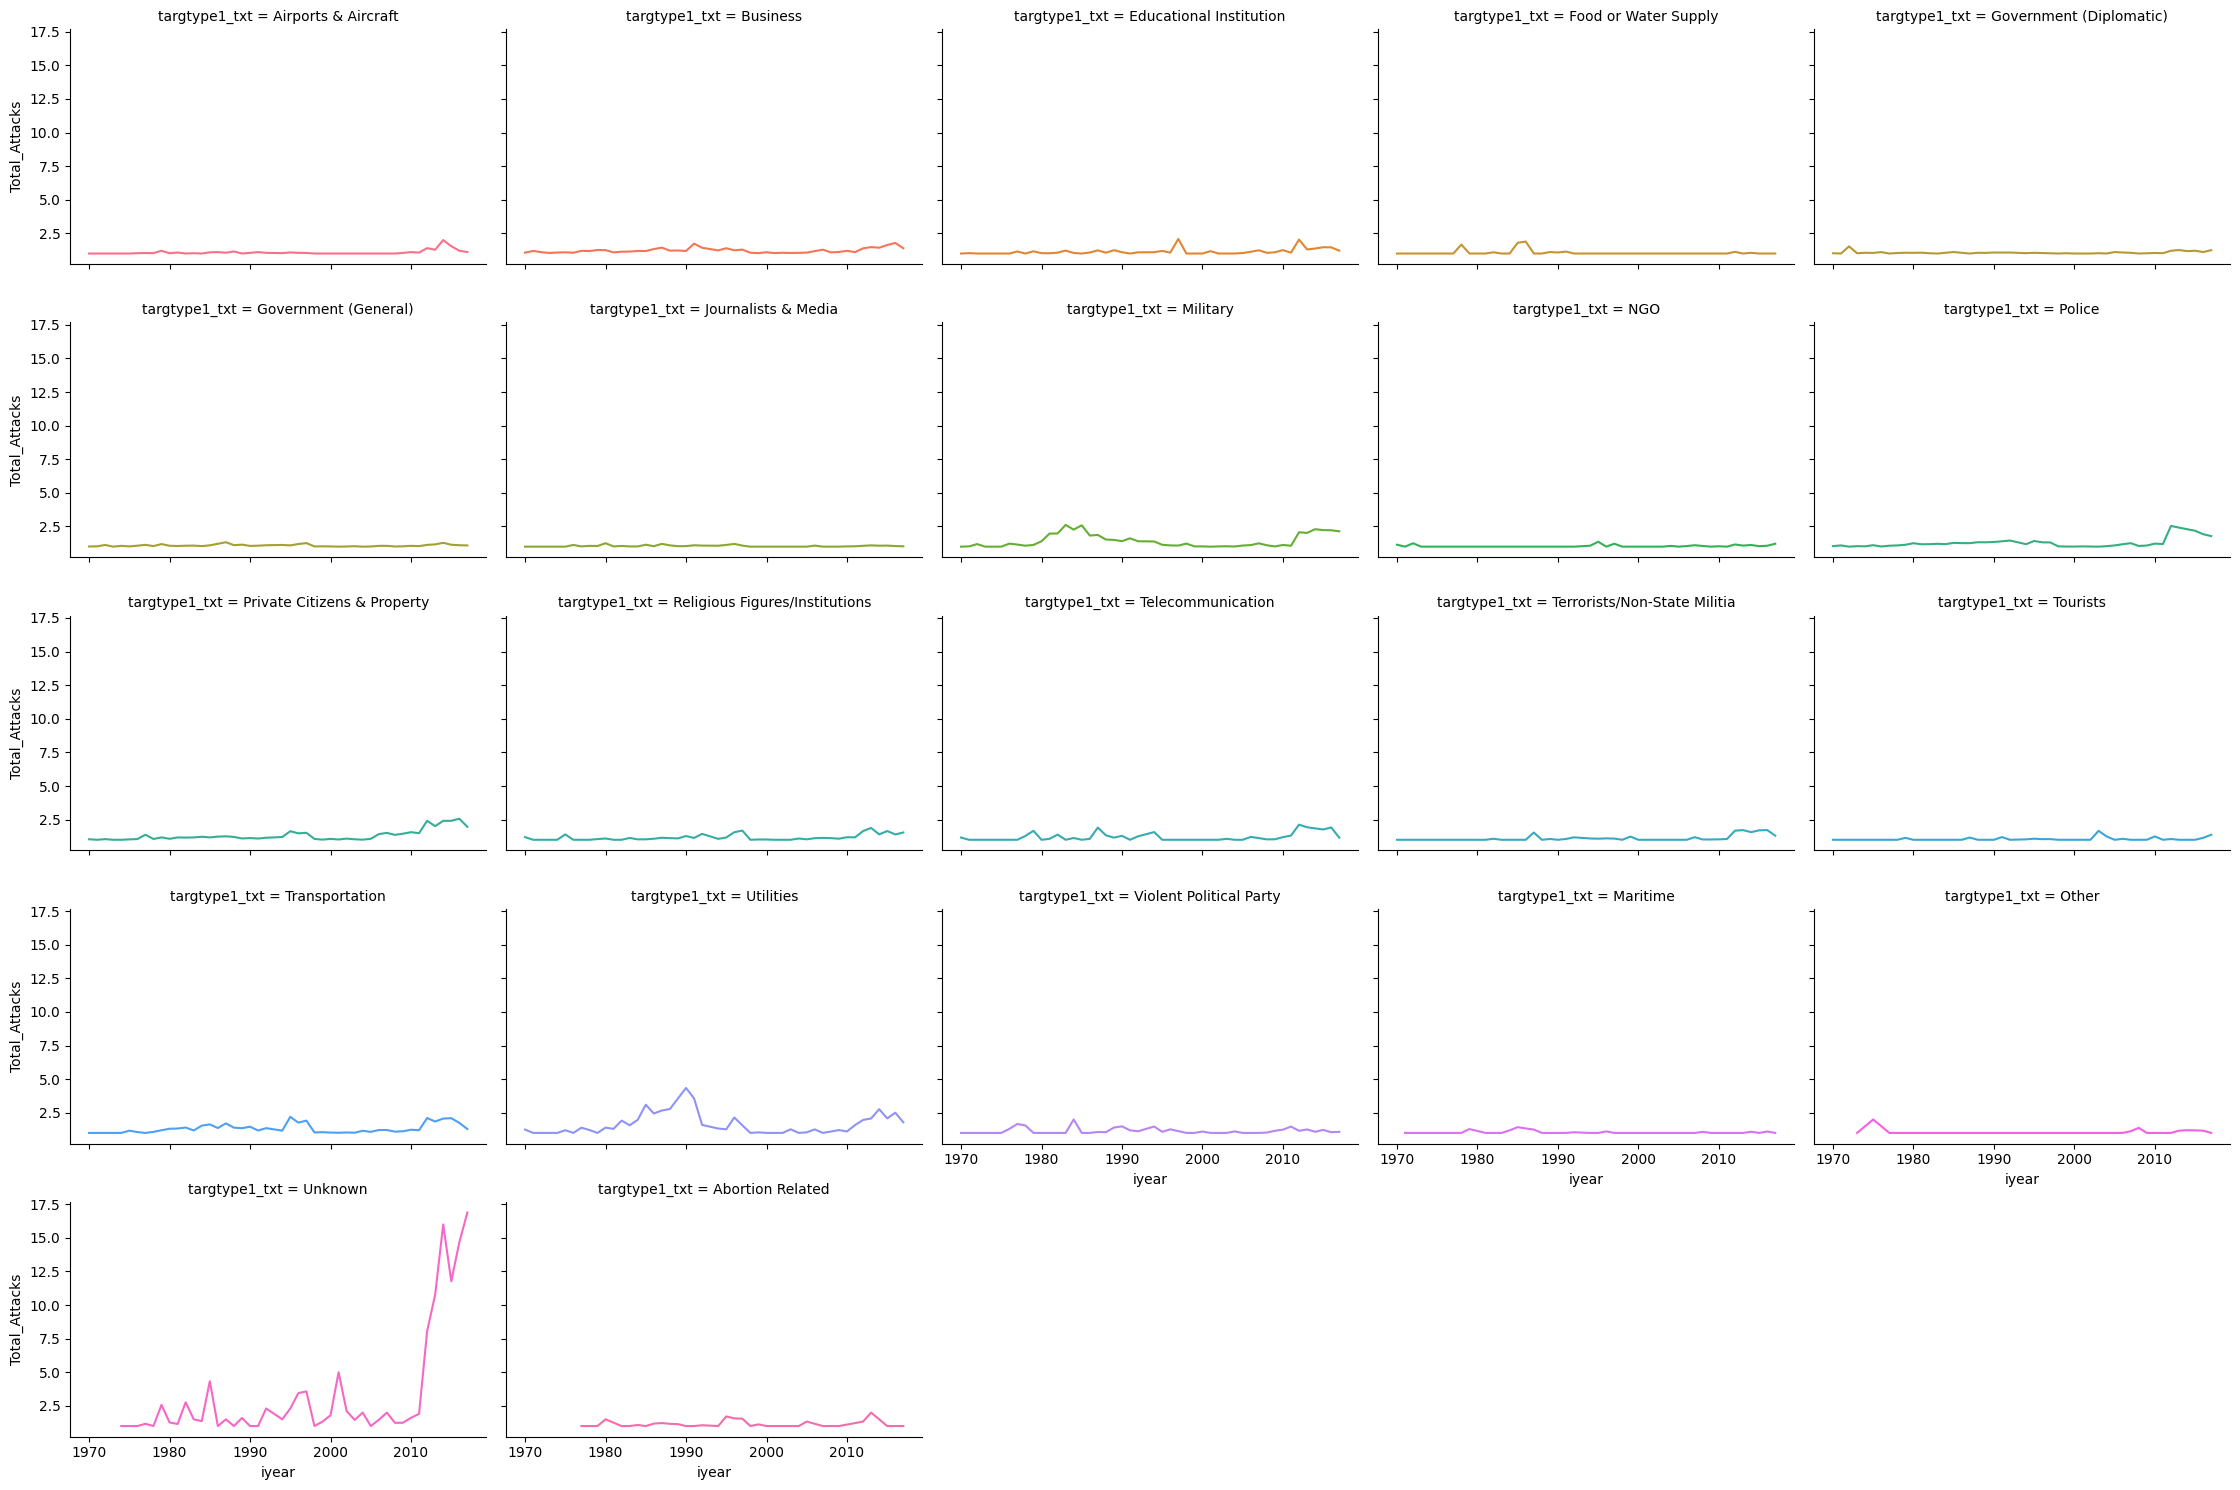

In [34]:
ax = sns.relplot(col="targtype1_txt", y="Total_Attacks",col_wrap=5, hue='targtype1_txt',x="iyear",kind='line', ci=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)
# ax.tick_params(rotation=45)

# Summary

Global Terrorism Analysis project done by me . I decided to take up this project solely due to my interest in this topic as I was the former student of International Relations. I have already done so many projects during Master's, and most of them were related to terrorism. I have taken analysis ideas from my Master's thesis and it helped me alot. When it comes to database it was quite difficult for me to understand the same. Previously, I had no idea what to do with them, from where to start. For first two days I have revised my thesis and understand the methodology i have applied. After doing some random EDA's i manage to do the project within a week.

# Glimpses Of The Prime Findings

1. Most of all events and a staggering of total number of terrorist attacks have been exclusive from the Middle East and North African region.

2. Iraq has been the country with highest number of attacks and most of all terrorist attacks have been from Iraq.

3. The huge rise in terror attacks in Iraq begun during 2014-2015.

4. It has been seen that explosives have always been the weapon of choice for terrorist organisations.

5. Private Citizens and military have always been the biggest targets for terrorist organisations.

6. It can be concluded that attacks by Taliban and Islamic State Of Iraq And Levant are on a arise.

7. Among Attack types, Bombing/Explosions and Armed Assault were highest in count.

8. Brunei is the country which has successfully tackle more than 5 terrorist attack.

9. Benin is the country which was not able to tackle the terrorist attack.

